# Content-based book recommendation system

determine which books are close to each other based on how similar the discussed topics are.

## 1a) define books to download from github

In [1]:
# Import library
import glob, re

In [2]:
import requests 
from bs4 import BeautifulSoup 
import urllib.parse

''' 
URL of the archive web-page which provides link to 
all video lectures. It would have been tiring to 
download each video manually. 
In this example, we first crawl the webpage to extract 
all the links and then download videos. 
'''
  
# specify the URL of the archive here 
archive_url = 'https://github.com/nehapai23/Book-Recommendations-from-Charles-Darwin/tree/master/datasets'
                #https://raw.githubusercontent.com/nehapai23/Book-Recommendations-from-Charles-Darwin/master/datasets/
def get_txt_links(): 
      
    # create response object 
    r = requests.get(archive_url) 
      
    # create beautiful-soup object 
    soup = BeautifulSoup(r.content,'html5lib') 
      
    # find all links on web-page 
    links = soup.findAll('a') 
    
    # filter the link sending with .txt 
    txt_links = [archive_url + link['href'] for link in links if link['href'].endswith('txt')]     
    #print("original txt: ")
    #print(txt_links)
    
    #treat url to convert to the raw datafile on github
    txt_links = [re.sub("github", "raw.githubusercontent", link) for link in txt_links]
    txt_links = [re.sub(("tree/master/datasets/nehapai23/Book-Recommendations-from-Charles-Darwin/blob/"), "", link) for link in txt_links]

    return txt_links

txt_links = get_txt_links() 

print("Click on link to check if working ok: ")
for a in txt_links:
    print(a)

Click on link to check if working ok: 
https://raw.githubusercontent.com/nehapai23/Book-Recommendations-from-Charles-Darwin/master/datasets/Autobiography.txt
https://raw.githubusercontent.com/nehapai23/Book-Recommendations-from-Charles-Darwin/master/datasets/CoralReefs.txt
https://raw.githubusercontent.com/nehapai23/Book-Recommendations-from-Charles-Darwin/master/datasets/DescentofMan.txt
https://raw.githubusercontent.com/nehapai23/Book-Recommendations-from-Charles-Darwin/master/datasets/DifferentFormsofFlowers.txt
https://raw.githubusercontent.com/nehapai23/Book-Recommendations-from-Charles-Darwin/master/datasets/EffectsCrossSelfFertilization.txt
https://raw.githubusercontent.com/nehapai23/Book-Recommendations-from-Charles-Darwin/master/datasets/ExpressionofEmotionManAnimals.txt
https://raw.githubusercontent.com/nehapai23/Book-Recommendations-from-Charles-Darwin/master/datasets/FormationVegetableMould.txt
https://raw.githubusercontent.com/nehapai23/Book-Recommendations-from-Charles-Da

## 1b) download the books

In [3]:
def download_txt_series(txt_links): 
  
    for link in txt_links: 
  
        '''iterate through all links in txt_links 
        and download them one by one'''
          
        # obtain filename by splitting url and getting  
        # last string 
        file_name = link.split('/')[-1]    
  
        print("Downloading file:%s"%file_name) 
          
        # create response object 
        r = requests.get(link, stream = True) 
          
        # download started 
        with open(file_name, 'wb') as f: 
            for chunk in r.iter_content(chunk_size = 1024*1024): 
                if chunk: 
                    f.write(chunk) 
          
        print("%s downloaded!\n"%file_name) 
  
    print("All files downloaded!")
    return

# download all txt 
download_txt_series(txt_links) 

Autobiography.txt downloaded!

CoralReefs.txt downloaded!

DescentofMan.txt downloaded!

DifferentFormsofFlowers.txt downloaded!

EffectsCrossSelfFertilization.txt downloaded!

ExpressionofEmotionManAnimals.txt downloaded!

FormationVegetableMould.txt downloaded!

FoundationsOriginofSpecies.txt downloaded!

GeologicalObservationsSouthAmerica.txt downloaded!

InsectivorousPlants.txt downloaded!

LifeandLettersVol1.txt downloaded!

LifeandLettersVol2.txt downloaded!

MonographCirripedia.txt downloaded!

MonographCirripediaVol2.txt downloaded!

MovementClimbingPlants.txt downloaded!

OriginofSpecies.txt downloaded!

PowerMovementPlants.txt downloaded!

VariationPlantsAnimalsDomestication.txt downloaded!

VolcanicIslands.txt downloaded!

VoyageBeagle.txt downloaded!

All files downloaded!


## 2) load into df

In [4]:
# Import library
import glob

# The books files are contained in this folder
folder = "Datasets/"

# List all the .txt files and sort them alphabetically
files = glob.glob(folder+"*.txt")
# ... YOUR CODE FOR TASK 1 ...
files.sort()
files

['Datasets/Autobiography.txt',
 'Datasets/CoralReefs.txt',
 'Datasets/DescentofMan.txt',
 'Datasets/DifferentFormsofFlowers.txt',
 'Datasets/EffectsCrossSelfFertilization.txt',
 'Datasets/ExpressionofEmotionManAnimals.txt',
 'Datasets/FormationVegetableMould.txt',
 'Datasets/FoundationsOriginofSpecies.txt',
 'Datasets/GeologicalObservationsSouthAmerica.txt',
 'Datasets/InsectivorousPlants.txt',
 'Datasets/LifeandLettersVol1.txt',
 'Datasets/LifeandLettersVol2.txt',
 'Datasets/MonographCirripedia.txt',
 'Datasets/MonographCirripediaVol2.txt',
 'Datasets/MovementClimbingPlants.txt',
 'Datasets/OriginofSpecies.txt',
 'Datasets/PowerMovementPlants.txt',
 'Datasets/VariationPlantsAnimalsDomestication.txt',
 'Datasets/VolcanicIslands.txt',
 'Datasets/VoyageBeagle.txt']

## 3. Load the contents of each book into Python

load the content of these books into Python and do some basic pre-processing to facilitate the downstream analyses. We call such a collection of texts a corpus. We will also store the titles for these books for future reference and print their respective length to get a gauge for their contents.

In [5]:
# Import libraries
import re, os

# Initialize the object that will contain the texts and titles
txts = []
titles = []

for n in files:
    # Open each file
    f = open(n, encoding='utf-8-sig')
    # Remove all non-alpha-numeric characters
    # ... YOUR CODE FOR TASK 2 ...
    # Store the texts and titles of the books in two separate lists
    text = re.sub('[^0-9a-zA-Z]+', '*', f.read())
    txts.append(text)
    titles.append(os.path.basename(f.name).replace(".txt",""))

# Print the length, in characters, of each book
[len(t) for t in txts]

[123231,
 496068,
 1776492,
 617088,
 913712,
 624230,
 335920,
 522975,
 797401,
 901406,
 1047518,
 1010643,
 766678,
 1657659,
 298319,
 916147,
 1093309,
 1043155,
 341447,
 1149574]

## 4. Find "On the Origin of Species"

In [6]:
# Browse the list containing all the titles
ori = -1
for i in range(len(titles)):
    # Store the index if the title is "OriginofSpecies"
    # ... YOUR CODE FOR TASK 3 ...
    if titles[i] == "OriginofSpecies":
        ori = i
        break

# Print the stored index - to be used when accessing BoW model later
print(ori)



15


## 5. Tokenize the corpus

transform each text into a list of the individual words (called tokens) it is made of. To check the output of our process, we will print the first 20 tokens of "On the Origin of Species".

In [54]:
# Define a list of stop words
stoplist = set('for a of the and to in to be which some is at that we i who whom show via may my our might as well'.split())

# Convert the text to lower case 
txts_lower_case = [txt.lower() for txt in txts]

# Transform the text into tokens 
txts_split = [txt.split("*") for txt in txts_lower_case]

# Remove tokens which are part of the list of stop words
texts = []
for txt in txts_split:
    token_removed = []
    for token in txt: 
        if token != "" and token not in stoplist:
            token_removed.append(token)
    texts.append(token_removed)
    
# Print the first 20 tokens for the "On the Origin of Species" book
# ... YOUR CODE FOR TASK 4 ...
texts[15][:20]



['on',
 'origin',
 'species',
 'but',
 'with',
 'regard',
 'material',
 'world',
 'can',
 'least',
 'go',
 'so',
 'far',
 'this',
 'can',
 'perceive',
 'events',
 'are',
 'brought',
 'about']

In [ ]:
#alternative to creating own stop list use preloaded one in spacey
import spacy
from spacy.lang.en import English

# using spacey's stop word set
stopwords = spacy.lang.en.stop_words.STOP_WORDS

# inspecting 10 in the set
list(stopwords)[:20]

## 6. Stemming of the tokenized corpus

In [55]:
texts[15][:20]

['on',
 'origin',
 'species',
 'but',
 'with',
 'regard',
 'material',
 'world',
 'can',
 'least',
 'go',
 'so',
 'far',
 'this',
 'can',
 'perceive',
 'events',
 'are',
 'brought',
 'about']

In [56]:
import nltk
from nltk.stem import PorterStemmer

#the stemmer will reduce a word to its root
porter = PorterStemmer()
print(porter.stem("having"))

have


In [57]:
#stemming
#initiate stemmer object
porter = PorterStemmer()
#stem all of the tokens (words) in all of the different books
stem_texts = [[porter.stem(token) for token in text] for text in texts]

#write this to a file to save running again
import pickle
# dumping to pickle so we don't have to repeat the stemming step when session ends
with open('Datasets/stem_texts.p', 'wb') as f:
    pickle.dump(stem_texts, f)

Stemming process, which will group together the inflected forms of a word so they can be analysed as a single item: the stem. In our On the Origin of Species example, the words related to the concept of selection would be gathered under the select stem.

As we are analysing 20 full books, the stemming algorithm can take several minutes to run and, in order to make the process faster, we will directly load the final results from a pickle file and review the method used to generate it.

In [60]:
import pickle

# Load the stemmed tokens list from the pregenerated pickle file
texts_stem = pickle.load(open("Datasets/stem_texts.p","rb") )

# Print the 20 first stemmed tokens from the "On the Origin of Species" book
print(texts_stem[15][:20])


['on', 'origin', 'speci', 'but', 'with', 'regard', 'materi', 'world', 'can', 'least', 'go', 'so', 'far', 'thi', 'can', 'perceiv', 'event', 'are', 'brought', 'about']


## Building a bag of words model

Create a universe of all words contained in our corpus of Charles Darwin's books, which we call a dictionary. Then, using the stemmed tokens and the dictionary, we will create bag-of-words models (BoW) of each of our texts. The BoW models will represent our books as a list of all uniques tokens they contain associated with their respective number of occurrences.

To better understand the structure of such a model, we will print the five first elements of one of the "On the Origin of Species" BoW model.

In [61]:
# Load the functions allowing to create and use dictionaries
from gensim import corpora

# Create a dictionary from the stemmed tokens
dictionary = corpora.Dictionary(texts_stem)

# Create a bag-of-words model for each book, using the previously generated dictionary
bows = [dictionary.doc2bow(txt) for txt in texts_stem]
#the BoW is a list of all uniques tokens they contain associated with their respective number of occurrences.


# Print the first five elements of the On the Origin of species' BoW model
bows[ori][: 5]

[(0, 11), (5, 51), (6, 1), (8, 2), (21, 1)]

In [62]:
print(bows[15][:5])

[(0, 11), (5, 51), (6, 1), (8, 2), (21, 1)]


## Most common words

In [63]:
# Import pandas to create and manipulate DataFrames
import pandas as pd

# Convert the BoW model for "On the Origin of Species" into a DataFrame = index 15
df_bow_origin = pd.DataFrame(bows[15])

# Add the column names to the DataFrame
# ... YOUR CODE FOR TASK 7 ...
df_bow_origin.columns = ['index','occurrences']

# Add a column containing the token corresponding to the dictionary index
# ... YOUR CODE FOR TASK 7 ...
df_bow_origin["token"] = [dictionary[index] for index in df_bow_origin["index"]]

# Sort the DataFrame by descending number of occurrences and print the first 10 values
# ... YOUR CODE FOR TASK 7 ...
df_bow_origin = df_bow_origin.sort_values(by=['occurrences'], ascending=False)
df_bow_origin[:10]

,index,occurrences,token
748,1168,2023,have
1119,1736,1558,on
1489,2288,1543,speci
892,1366,1480,it
239,393,1362,by
1128,1747,1201,or
125,218,1140,are
665,1043,1137,from
1774,2703,1000,with
1609,2452,962,thi


## Build a tf-idf model

apart from the word species, all of the other words are quite common and it would be hard to tell which book they came from.

**tf-idf model** (term frequency–inverse document frequency). This model defines the importance of each word depending on how frequent it is in this text and how infrequent it is in all the other documents. As a result, a **high tf-idf score for a word will indicate that this word is specific to this text**.

In [64]:
# Load the gensim functions that will allow us to generate tf-idf models
from gensim.models import TfidfModel

# Generate the tf-idf model
model = TfidfModel(bows)

# Print the model for "On the Origin of Species"
model[bows[ori]]

[(8, 0.00020383224047642202),
 (21, 0.0005716037746542094),
 (23, 0.0017118699041370883),
 (27, 0.0006458270601429994),
 (28, 0.0025678048562056324),
 (31, 0.0008559349520685442),
 (35, 0.00101497410751472),
 (36, 0.00101497410751472),
 (51, 0.000886740665721021),
 (54, 0.00202994821502944),
 (56, 0.0023757190244598344),
 (57, 0.00010191612023821101),
 (63, 0.0027544680933525786),
 (64, 0.000509580601191055),
 (66, 0.00020383224047642202),
 (67, 0.0023757190244598344),
 (68, 0.00202994821502944),
 (75, 0.0013772340466762893),
 (76, 0.0004433703328605105),
 (78, 0.004171843479607349),
 (80, 0.0020859217398036746),
 (83, 0.00857405661981314),
 (84, 0.000509580601191055),
 (88, 0.002445986885717064),
 (89, 0.0033632319678609636),
 (90, 0.000886740665721021),
 (91, 0.0016747506839411234),
 (94, 0.000886740665721021),
 (95, 0.0004433703328605105),
 (96, 0.003546962662884084),
 (97, 0.0016306579238113761),
 (102, 0.037686478293143394),
 (104, 0.000917245082143899),
 (106, 0.00141737538625477

In [65]:
# Convert the tf-idf model for "On the Origin of Species" into a DataFrame
df_tfidf = pd.DataFrame(model[bows[ori]])

# Name the columns of the DataFrame id and score
df_tfidf.columns = ['id', 'score']

# Add the tokens corresponding to the numerical indices for better readability
df_tfidf['token'] = df_tfidf['id'].apply(lambda x: dictionary[x])

# Sort the DataFrame by descending tf-idf score and print the first 10 rows.
df_tfidf = df_tfidf.sort_values('score', ascending=False)
df_tfidf.head(10)

,id,score,token
878,2164,0.327414,select
3106,10108,0.203908,pigeon
128,369,0.197721,breed
2988,9396,0.167496,migrat
945,2325,0.148186,steril
284,752,0.145990,domest
503,1255,0.128272,hybrid
370,966,0.127534,fertil
3889,16210,0.124392,rtner
3540,12715,0.121197,naturalis


## Compute distance between texts

We can, for example, see that topics such as selection, breeding or domestication are defining "On the Origin of Species" (and yes, in this book, Charles Darwin talks quite a lot about pigeons too). Now that we have a model associating tokens to how specific they are to each book, we can measure how related to books are between each other.

To this purpose, we will use a **measure of similarity called cosine similarity** and we will visualize the results as a distance matrix, i.e., a matrix showing all pairwise distances between Darwin's books.

In [67]:
# Load the library allowing similarity computations
from gensim import similarities

# Compute the similarity matrix (pairwise distance between all texts)
sims = similarities.MatrixSimilarity(model[bows])

# Transform the resulting list into a dataframe
sim_df = pd.DataFrame(list(sims))

# Add the titles of the books as columns and index of the dataframe
sim_df.columns = titles
sim_df.index = titles

# Print the resulting matrix
sim_df

,Autobiography,CoralReefs,DescentofMan,DifferentFormsofFlowers,EffectsCrossSelfFertilization,ExpressionofEmotionManAnimals,FormationVegetableMould,FoundationsOriginofSpecies,GeologicalObservationsSouthAmerica,InsectivorousPlants,LifeandLettersVol1,LifeandLettersVol2,MonographCirripedia,MonographCirripediaVol2,MovementClimbingPlants,OriginofSpecies,PowerMovementPlants,VariationPlantsAnimalsDomestication,VolcanicIslands,VoyageBeagle
Autobiography,1.000000,0.049467,0.080428,0.066482,0.077184,0.088723,0.040678,0.059271,0.030562,0.014878,0.396709,0.217129,0.005686,0.008483,0.022856,0.099991,0.016247,0.049018,0.038556,0.183507
CoralReefs,0.049467,1.000000,0.009480,0.001952,0.001923,0.004999,0.029432,0.022096,0.061027,0.002276,0.030965,0.017558,0.006324,0.010579,0.001518,0.039089,0.002707,0.011586,0.057514,0.267749
DescentofMan,0.080428,0.009480,1.000000,0.072761,0.029968,0.148670,0.027055,0.135775,0.009698,0.009404,0.059684,0.080314,0.053506,0.043275,0.005146,0.267554,0.011357,0.232841,0.007882,0.123917
DifferentFormsofFlowers,0.066482,0.001952,0.072761,1.000000,0.391834,0.006474,0.010585,0.040104,0.002846,0.007502,0.015933,0.046523,0.009405,0.005484,0.008151,0.128909,0.018964,0.050023,0.002611,0.013124
EffectsCrossSelfFertilization,0.077184,0.001923,0.029968,0.391834,1.000000,0.006844,0.032262,0.040288,0.002246,0.006777,0.019504,0.046504,0.003212,0.002962,0.014932,0.146441,0.039770,0.055132,0.002178,0.017140
ExpressionofEmotionManAnimals,0.088723,0.004999,0.148670,0.006474,0.006844,1.000000,0.020985,0.047202,0.005217,0.011475,0.064873,0.048886,0.016825,0.029897,0.005913,0.062979,0.011317,0.083847,0.005561,0.098961
FormationVegetableMould,0.040678,0.029432,0.027055,0.010585,0.032262,0.020985,1.000000,0.021470,0.067989,0.035589,0.027916,0.023620,0.019866,0.023984,0.038820,0.049258,0.040182,0.033147,0.059407,0.097908
FoundationsOriginofSpecies,0.059271,0.022096,0.135775,0.040104,0.040288,0.047202,0.021470,1.000000,0.028028,0.006023,0.057820,0.054782,0.007618,0.010883,0.003973,0.322405,0.008788,0.194533,0.017590,0.089132
GeologicalObservationsSouthAmerica,0.030562,0.061027,0.009698,0.002846,0.002246,0.005217,0.067989,0.028028,1.000000,0.006879,0.028551,0.012104,0.009687,0.024738,0.002043,0.058046,0.003491,0.014389,0.373249,0.260141
InsectivorousPlants,0.014878,0.002276,0.009404,0.007502,0.006777,0.011475,0.035589,0.006023,0.006879,1.000000,0.005967,0.016518,0.019214,0.020023,0.249814,0.014961,0.023056,0.010522,0.008544,0.014776


## 11. The book most similar to "On the Origin of Species"


We now have a matrix containing all the similarity measures between any pair of books from Charles Darwin! We can now use this matrix to quickly extract the information we need, i.e., the distance between one book and one or several others.

As a first step, we will display which books are the most similar to "On the Origin of Species," more specifically we will produce a bar chart showing all books ranked by how similar they are to Darwin's landmark work.


Text(0.5, 1.0, 'Similarity')

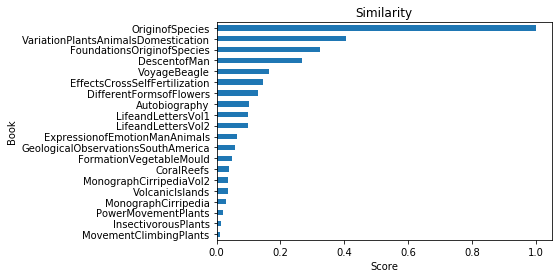

In [68]:
# This is needed to display plots in a notebook
%matplotlib inline

# Import libraries
import matplotlib.pyplot as plt

# Select the column corresponding to "On the Origin of Species" and 
v = sim_df['OriginofSpecies']

# Sort by ascending scores
v_sorted = v.sort_values()

# Plot this data has a horizontal bar plot
v_sorted.plot.barh(x='lab', y='val', rot=0).plot()

# Modify the axes labels and plot title for a better readability
plt.xlabel("Score")
plt.ylabel("Book")
plt.title("Similarity")

In [70]:
## dendrogram 

However, we now want to have a better understanding of the big picture and see how Darwin's books are generally related to each other (in terms of topics discussed). To this purpose, we will represent the whole similarity matrix as a dendrogram, which is a standard tool to display such data. This last approach will display all the information about book similarities at once. For example, we can find a book's closest relative but, also, we can visualize which groups of books have similar topics (e.g., the cluster about Charles Darwin personal life with his autobiography and letters). If you are familiar with Darwin's bibliography, the results should not surprise you too much, which indicates the method gives good results. Otherwise, next time you read one of the author's book, you will know which other books to read next in order to learn more about the topics it addressed.

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [160.0, 160.0, 182.5, 182.5],
  [140.0, 140.0, 171.25, 171.25],
  [110.0, 110.0, 155.625, 155.625],
  [80.0, 80.0, 132.8125, 132.8125],
  [43.75, 43.75, 106.40625, 106.40625],
  [12.5, 12.5, 75.078125, 75.078125]],
 'dcoord': [[0.0, 0.26140242868949015, 0.26140242868949015, 0.0],
  [0.0, 1.3236890024643562, 1.3236890024643562, 0.26140242868949015],
  [0.0, 0.8674413054551388, 0.8674413054551388, 0.0],
  [0.0, 1.1416961380115294, 1.1416961380115294, 0.8674413054551388],
  [0.0, 1.1971848433348915, 1.1971848433348915, 1.1416961380115294],
  [0.0, 0.6763229595190197, 0.6763229595190197, 0.0],
  [

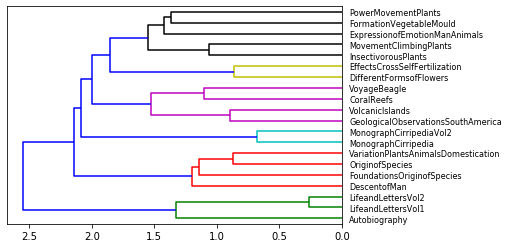

In [71]:
# Import libraries
from scipy.cluster import hierarchy

# Compute the clusters from the similarity matrix,
# using the Ward variance minimization algorithm
Z = hierarchy.linkage(sims, 'ward')

# Display this result as a horizontal dendrogram
hierarchy.dendrogram(Z, leaf_font_size=8, labels=sim_df.index, orientation='left')